# EulerRots.py demo

In [1]:
%matplotlib inline
import EulerRots as rotkit
# in order to work correctly, you need to have compiled the fortran routines Rotkit_f for your machine
import os
import pandas as pd
import numpy as np

#only needed for the plots
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Tab-delimited files consisting of sets of finite rotations for different plate pairs are built into a rotation model using the rotsets_from_file function, which generates an initial list of FiniteRotationSet objects. 

The original rotation file contains a set of absolute plate rotations for Nubia relative to the Indo-Atlantic hotspot reference frame according to the 'fixed hotspot' model of O'Neill et al. (2005). A second rotation model which instead has the 'moving hotspot' rotations from the same paper can be set up by creating a copy of the original, then swapping in the new hotspot rotations from another file. The insert_rots() function detects that the plate pair for the new rotationset is already represented, and asks if you want to substitute in the new one or not.

In [3]:
rotmodel=rotkit.EulerRotationModel(rotkit.rotsets_from_file('./Datafiles/GlobalRots.txt'))

rotmodel2=rotkit.EulerRotationModel(rotmodel.rotationsets)
rotmodel2.insert_rots(rotkit.rotsets_from_file('./Datafiles/NUB_MANTmoving_rots.txt'))

Finite rotation set for 701-1 already exists. Replace? [Y/n] Y
Substitution made.


The .summary() command gives the basic details for the sets of finite rotations in the rotation model. Note how the order has changed in rotmodel2 due the removal and replacement of the Nubia/Indo-Atlantic hotspot rotations 

In [4]:
rotmodel.summary()

,MovingPlate,MovingPlateName,FixedPlate,FixedPlateName,N,Youngest,Oldest
0,911,"Nazca Plate, East Pacific",901,Pacific Plate,15,0.0,83.500
1,802,Antarctica and East Antarctica,709,Somalia Plate,22,0.0,83.000
2,709,Somalia Plate,701,African Craton,7,0.0,85.000
3,701,African Craton,1,Indo-Atlantic Hotspots (Present Day),12,0.0,120.000
4,301,Northern European Craton and Eurasia,101,North American Craton,30,0.0,79.080
5,101,North American Craton,701,African Craton,38,0.0,154.300
6,201,South American Craton,701,African Craton,14,0.0,83.000
7,511,Central Indian Basin,709,Somalia Plate,35,0.0,65.118
8,501,Indian Craton,709,Somalia Plate,35,0.0,65.120
9,901,Pacific Plate,3,Pacific Hotspots (Present Day),23,0.0,83.700


In [5]:
rotmodel2.summary()

,MovingPlate,MovingPlateName,FixedPlate,FixedPlateName,N,Youngest,Oldest
0,911,"Nazca Plate, East Pacific",901,Pacific Plate,15,0.0,83.500
1,802,Antarctica and East Antarctica,709,Somalia Plate,22,0.0,83.000
2,709,Somalia Plate,701,African Craton,7,0.0,85.000
3,301,Northern European Craton and Eurasia,101,North American Craton,30,0.0,79.080
4,101,North American Craton,701,African Craton,38,0.0,154.300
5,201,South American Craton,701,African Craton,14,0.0,83.000
6,511,Central Indian Basin,709,Somalia Plate,35,0.0,65.118
7,501,Indian Craton,709,Somalia Plate,35,0.0,65.120
8,901,Pacific Plate,3,Pacific Hotspots (Present Day),23,0.0,83.700
9,901,Pacific Plate,804,Marie Byrdland (Ross Terrane) and West Antarctica,57,0.0,90.000


Each EulerRotationModel is a collection of FiniteRotationSets, which are themselves a collection of EulerRotations:

In [6]:
rotmodel.rotationsets

In [7]:
rotmodel.rotationsets[0].summary()

,MovingPlate,FixedPlate,StartAge,EndAge,RotLat,RotLong,RotAng
0,911,901,0.0,0.00,52.70,-88.60,0.000
1,911,901,0.0,0.78,52.70,-88.60,-1.034
2,911,901,0.0,6.57,-54.38,85.34,9.680
3,911,901,0.0,8.86,-58.23,86.36,13.180
4,911,901,0.0,10.95,-60.01,86.73,16.860
5,911,901,0.0,13.07,-62.00,87.21,19.630
6,911,901,0.0,15.10,-64.52,83.61,23.100
7,911,901,0.0,17.45,-72.22,89.27,26.490
8,911,901,0.0,23.00,73.53,-92.61,-31.080
9,911,901,0.0,33.10,76.10,-110.70,-45.270


In [8]:
rotmodel.rotationsets[0].rotations

In [9]:
rotmodel.rotationsets[0].rotations[4].details()

MovingPlate                   911
FixedPlate                    901
Timescale               Undefined
StartChron                   None
EndChron                       5o
StartAge                        0
EndAge                      10.95
RotLat                     -60.01
RotLong                     86.73
RotAng                      16.86
Kappahat                     0.34
a                        6.69e-07
b                        1.22e-06
c                        6.48e-07
d                        7.01e-06
e                         3.3e-06
f                        1.65e-06
Points                         42
Segs                            3
Plates                          2
DOF                            33
Source         Wilder 2003 Thesis
dtype: object

In [10]:
rotmodel.rotationsets[0].rotations[4].Covariances

Kappahat    3.400000e-01
a           6.690000e-07
b           1.220000e-06
c           6.480000e-07
d           7.010000e-06
e           3.300000e-06
f           1.650000e-06
dtype: float64

In addition to simple operations (add, interpolate, invert etc.) there are more complex functions which do the hard work of generating useful products. For the present, the most useful for you are probably get_rots and synthetic_APWP: 

In [11]:
ages=np.arange(10,121,10).tolist()
result=rotmodel.get_rots(101,1,ages)
result.summary()

,MovingPlate,FixedPlate,StartAge,EndAge,RotLat,RotLong,RotAng
0,101,1,0.0,0.0,-80.100117,165.045108,0.000000
1,101,1,0.0,10.0,-80.100117,165.045108,3.514040
2,101,1,0.0,20.0,-71.649049,145.646337,8.619670
3,101,1,0.0,30.0,45.983871,85.085066,5.464042
4,101,1,0.0,40.0,56.215425,79.185457,8.132674
5,101,1,0.0,50.0,54.712241,122.754552,16.623522
6,101,1,0.0,60.0,52.043323,119.435341,19.321183
7,101,1,0.0,70.0,53.338870,109.195748,18.878532
8,101,1,0.0,80.0,57.153072,102.979130,21.927417
9,101,1,0.0,90.0,62.360178,112.744141,32.533444


In [12]:
path=rotmodel.synthetic_APWP(101,1,ages)
path

,Name,PlateCode,FeatureAge,ReconstructionAge,Lat,Lon,MaxError,MinError,MaxBearing
0,VGP-10,101,10,0.0,89.396065,256.776474,0.754324,0.418242,-16.136356
1,VGP-20,101,20,0.0,87.288549,239.737844,0.853707,0.667503,107.648700
2,VGP-30,101,30,0.0,86.203977,173.119608,1.627898,0.905915,-37.130194
3,VGP-40,101,40,0.0,85.480298,165.804033,4.899604,2.659581,96.130188
4,VGP-50,101,50,0.0,80.419374,205.954123,4.636772,3.103028,-42.534259
5,VGP-60,101,60,0.0,78.151334,201.790895,4.247151,2.847851,115.016532
6,VGP-70,101,70,0.0,78.760895,191.599317,5.687727,3.448543,110.318890
7,VGP-80,101,80,0.0,78.158042,183.735224,6.565030,3.369459,104.323297
8,VGP-90,101,90,0.0,75.067067,188.250913,4.818819,3.185840,124.155529
9,VGP-100,101,100,0.0,71.401366,159.962178,2.499382,2.102078,21.851389


Just to show what this looks like, a quick comparison of the synthetic APWPs for the moving and fixed hotspot reference frame:

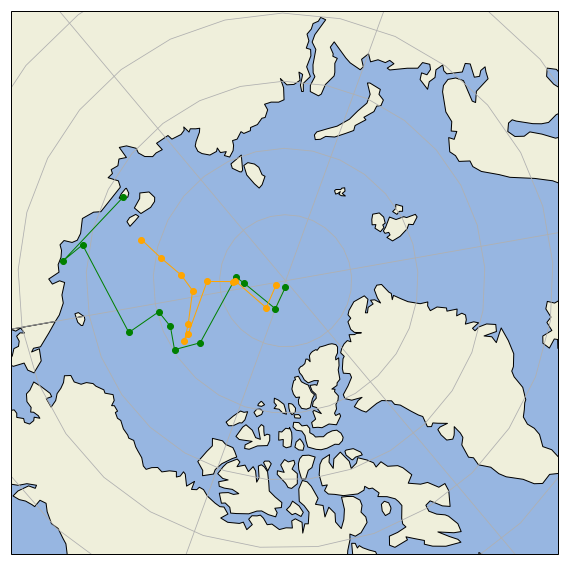

In [14]:
path2=rotmodel2.synthetic_APWP(101,1,ages)

plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(-100))
ax.set_extent([-180, 180, 65, 90], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.gridlines()

plt.plot(path.Lon, path.Lat, 'o-',
         color='green', linewidth=1,
         transform=ccrs.Geodetic())

plt.plot(path2.Lon, path2.Lat, 'o-',
         color='orange', linewidth=1,
         transform=ccrs.Geodetic())